# Analysis of experiment data

Tsvetkova, M., Olsson, H., & Galesic, M. (2024). Social networks affect redistribution decisions and polarization. https://doi.org/10.31219/osf.io/bw7ux

In [32]:
import os, sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

module_path = os.path.abspath(os.path.join('modules/'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from read_django_data import * 
from plot import *
from stat_tests import *

DATAFILES = [('exp-data/vgame_1.db', 1), ('exp-data/vgame_2.db', 2), ('exp-data/vgame_3.db', 3)]
PROLIFIC_FILES = ['exp-data/' + i for i in ['vgame_1_prolific_export.csv', 
                                          'vgame_2_prolific_export.csv', 
                                          'vgame_3_prolific_export.csv']]

init_plot()

## 0. Get the data

In [33]:
# NOTE: Some code is commented out to protect Prolific user identities
# Instead, we are providing pre-processed data files

# # Get group outcomes per round
# record_df = combine_datasets(DATAFILES, get_player_records)
# turnout_df = get_participant_turnout(record_df)
# # Merge turnout with Prolific participant data and export for R analysis
# turnout_df = merge_with_prolific_demos(turnout_df, datasets=DATAFILES, 
#                           prolific_files=PROLIFIC_FILES,
#                           csv_path='exp-data/player_turnout.csv')

# # Quiz data merged with Prolific participant data to export for R analysis
# quiz_df = combine_datasets(DATAFILES, get_quiz_results)
# prolific_df = get_prolific_demo_data(PROLIFIC_FILES)
# quiz_df = pd.merge(quiz_df, prolific_df, on='participant_id', how='left')
# quiz_df.to_csv('exp-data/quiz_answers.csv', index=False)


# NOTE: There are some duplicate records in the first 2 batches (see WARNING output). 
# However, these turn out not to be consequential. The only issue is that 
# in Round 3 for Group 117 (Batch 1, Treatment hete), the experiment showed (and paid off) 
# final vote of 45, which should have been 42 when duplicate decisions are ignored.
# The analyses below use the correct result of 42 (not the incorrect one participants saw).

# Get individual decisions with individual and group context
# vote_df = combine_datasets(DATAFILES, get_player_votes_with_context, 
#                            csv_path='exp-data/player_decisions.csv')
vote_df = pd.read_csv('exp-data/player_decisions.csv')
vote_df = categorize_df(vote_df)

# Get group inequality and polarization from decision data
# outcome_df = get_group_outcomes_from_votes(vote_df, csv_path='exp-data/group_outcomes.csv')
outcome_df = pd.read_csv('exp-data/group_outcomes.csv')
outcome_df = categorize_df(outcome_df)

# Get survey responses - can merge with vote_df on 'sid'
# part_df = combine_datasets(DATAFILES, get_participant_data, csv_path='exp-data/player_data.csv')
part_df = pd.read_csv('exp-data/player_data.csv')
part_df = categorize_df(part_df)

# Merge with hand coded responses
manual_df = pd.read_excel('exp-data/player_opinion_manual_code.xlsx')
part_df = pd.merge(part_df, manual_df, 
                     on='sid', 
                     how='left')



## 1. Group outcomes


********* ROUND 1 *********


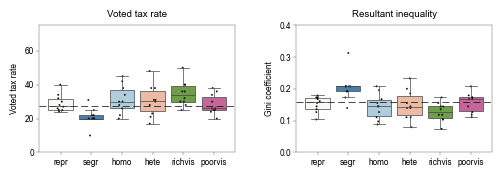

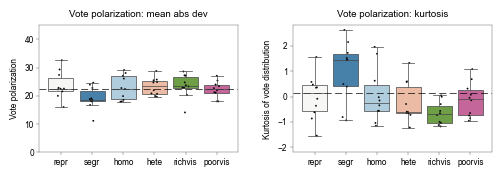

*** Median Vote ***
         segr     homo    hete      rich     poor
repr  0.002**    0.495   0.791    0.063+    0.704
segr           0.006**  0.016*  0.001***  0.007**
homo                     0.940     0.403    0.362
hete                               0.288    0.596
rich                                       0.053+
*** Variance of votes ***
        segr   homo    hete    rich   poor
repr  0.038*  0.473   0.521   0.791  0.273
segr          0.186  0.064+  0.064+  0.241
homo                  0.910   0.734  0.623
hete                          0.678  0.521
rich                                 0.473
*** Mean absolute deviation of votes ***
        segr   homo     hete    rich   poor
repr  0.076+  0.678    0.734   0.521  0.623
segr          0.121  0.009**  0.026*  0.121
homo                   0.940   0.521  0.734
hete                           0.734  0.650
rich                                  0.273
*** Kurtosis of votes ***
        segr   homo    hete     rich    poor
repr  0.064+  1.000 

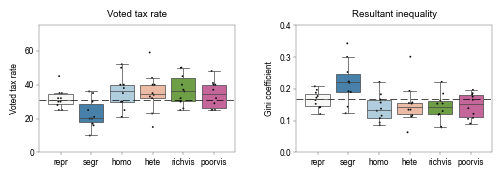

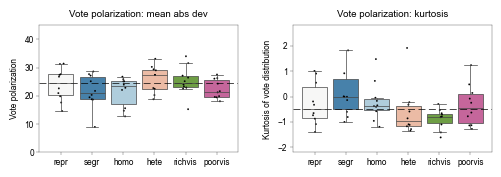

*** Median Vote ***
        segr     homo    hete     rich     poor
repr  0.037*    0.304   0.271    0.149    0.567
segr          0.008**  0.028*  0.004**  0.010**
homo                    1.000    0.879    0.761
hete                             0.762    0.879
rich                                      0.494
*** Variance of votes ***
       segr   homo   hete   rich    poor
repr  0.345  0.273  0.473  1.000   0.273
segr         0.970  0.104  0.345   0.850
homo                0.121  0.623   0.623
hete                       0.521  0.031*
rich                               0.140
*** Mean absolute deviation of votes ***
       segr   homo    hete   rich    poor
repr  0.473  0.307   0.427  0.678   0.427
segr         0.880  0.064+  0.241   1.000
homo                0.076+  0.162   0.910
hete                        0.791  0.064+
rich                                0.162
*** Kurtosis of votes ***
       segr   homo    hete     rich   poor
repr  0.212  0.734   0.273    0.121  0.910
segr         0.

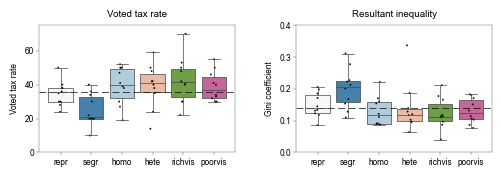

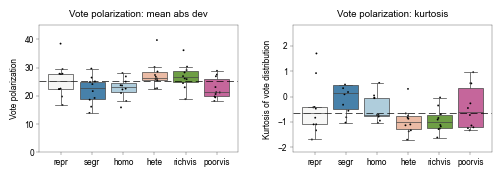

*** Median Vote ***
        segr    homo    hete     rich    poor
repr  0.030*   0.239   0.211    0.119   0.305
segr          0.019*  0.012*  0.004**  0.011*
homo                   1.000    0.595   0.940
hete                            0.705   0.677
rich                                    0.649
*** Variance of votes ***
       segr   homo    hete   rich    poor
repr  0.307  0.521   0.427  0.473   0.140
segr         0.910   0.104  0.104   0.970
homo                0.076+  0.104   0.571
hete                        0.791  0.021*
rich                               0.054+
*** Mean absolute deviation of votes ***
       segr   homo    hete    rich    poor
repr  0.212  0.385   0.427   0.473   0.212
segr         0.910  0.021*  0.045*   0.791
homo                0.026*  0.031*   0.850
hete                         0.970  0.045*
rich                                0.064+
*** Kurtosis of votes ***
        segr   homo     hete     rich   poor
repr  0.076+  0.473    0.241    0.385  0.910
segr       

In [34]:
for r in [1, 2, 3]:
    print('\n********* ROUND ' + str(r) + ' *********')
    # Game statistics for first round only
    df = outcome_df[outcome_df['round']==r].drop(columns=['round'])

    # Voted tax rate in the first round and 
    # inequality in second round resulting from the vote 
    bl_vote = np.median( df[(df['network_type']=='repr')]['median_vote'].values )
    bl_gini = np.median( df[(df['network_type']=='repr')]['score_gini'].values )
    plot2_y_net_box(data1=df, y1='median_vote', title1='Voted tax rate', ylim1=(0, 75),
                    data2=df, y2='score_gini', title2='Resultant inequality', ylim2=(0, 0.4), 
                    baseline1=bl_vote, baseline2=bl_gini)

    # Distribution plot of vote mean absolute deviation and kurtosis in first period
    bl_var = np.median( df[(df['network_type']=='repr')]['vote_var'].values )
    bl_mad = np.median( df[(df['network_type']=='repr')]['vote_mad'].values )
    bl_kurt = np.median( df[(df['network_type']=='repr')]['vote_kurt'].values )
    # MAD is more interepretable than variance
    plot2_y_net_box(data1=df, y1='vote_mad', title1='Vote polarization: mean abs dev', ylim1=(0, 45), 
                    data2=df, y2='vote_kurt', title2='Vote polarization: kurtosis', ylim2=(-2.2, 2.8), 
                    baseline1=bl_mad, baseline2=bl_kurt)

    # Mann-Whitney U
    print('*** Median Vote ***')
    print(pairwise_test(df, 'median_vote'))  

    print('*** Variance of votes ***')
    print(pairwise_test(df, 'vote_var'))

    print('*** Mean absolute deviation of votes ***')
    print(pairwise_test(df, 'vote_mad'))

    print('*** Kurtosis of votes ***')
    print(pairwise_test(df, 'vote_kurt'))

## 2. Summary results and dynamics

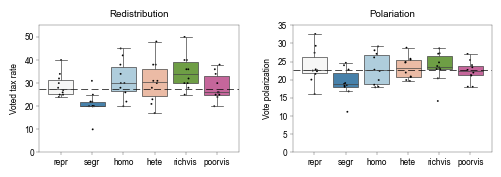

In [35]:
# First-round results
df_first = outcome_df[outcome_df['round']==1].drop(columns=['round'])
bl_vote_first = np.median( df_first[(df_first['network_type']=='repr')]['median_vote'].values )
bl_mad_first = np.median( df_first[(df_first['network_type']=='repr')]['vote_mad'].values )
plot2_y_net_box(data1=df_first, y1='median_vote', title1='Redistribution', ylim1=(0, 55), # Voted tax rate
                data2=df_first, y2='vote_mad', title2='Polariation', ylim2=(0, 35),  # Vote polarization
                baseline1=bl_vote_first, baseline2=bl_mad_first)

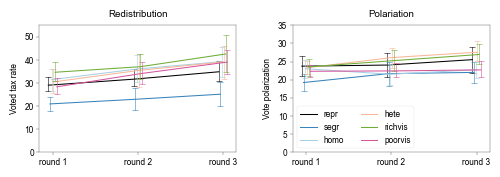

In [36]:
plot2_dynamics(data1=outcome_df, y1='median_vote', title1='Redistribution', ylim1=(0, 55), # Voted tax rate
                data2=outcome_df, y2='vote_mad', title2='Polariation', ylim2=(0, 35),  # Vote polarization
                errorbar='ci')

## 3. Individual decisions

### 3A. Polarization as group divergence - median vote distance between rich and poor

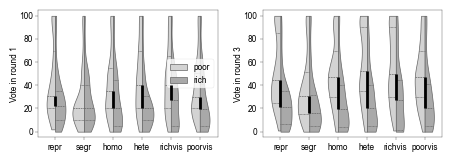

In [37]:
# Distribution of individual votes by status (rich/poor) and treatment
# Black points and lines show medians with CIs estimated via bootstrapping: 
# a procedure where the dataset is randomly resampled with replacement 
# a number of times, and the estimate is recalculated from each resample. 
plot2_votes_by_status(vote_df)

### 3B. Voter turnout

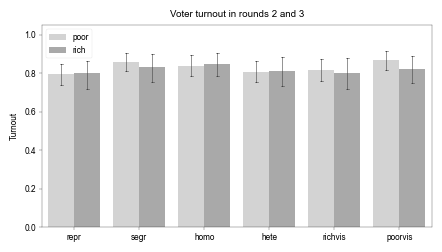

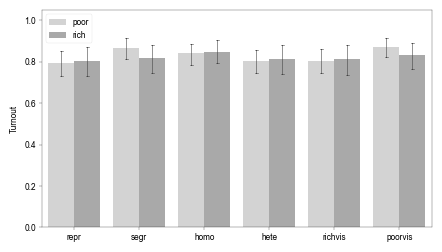

In [38]:
# Voter turnout in Rounds 2 and 3 by status (rich/poor) and treatment
# Appears to be at random but REPEAT WITH 0's REMOVED
turnout_df = pd.read_csv('exp-data/player_turnout.csv')
plot_turnout(turnout_df, var='turnout2_frac', title="Voter turnout in rounds 2 and 3")
plot_turnout(turnout_df, var='turnout3_frac', title=None, save='plots/figS10.pdf')


### 3C. Change in vote

In [39]:
# Create lagged variables to estimate change

df_delta = vote_df.sort_values(by=['sid', 'round'])

# New variable for change in vote from previous round
df_delta['prev_vote'] = df_delta.groupby(['sid'])['vote'].shift(1)
df_delta['vote_change'] = df_delta['vote'] - df_delta['prev_vote']
# For decrease, normalize by the possible decrease
df_delta['vote_change_frac'] = df_delta['vote_change'] / df_delta['prev_vote']
# For increase, normalize by what is possible up to 100
df_delta.loc[df_delta['vote_change'] > 0, 'vote_change_frac'] = df_delta['vote_change'] / (100 - df_delta['prev_vote'])

# New variable for distance of vote from median vote 
df_delta['prev_median_vote'] = df_delta.groupby(['sid'])['median_vote'].shift(1)
df_delta['prev_vote_dist'] = df_delta['prev_vote'] - df_delta['prev_median_vote'] 
df_delta['new_vote_dist'] = df_delta['vote'] - df_delta['prev_median_vote'] 
# For decrease, normalize by the median
df_delta['new_vote_dist_frac'] = df_delta['new_vote_dist'] / df_delta['prev_median_vote']
# For increase, normalize by what is possible up to 100
df_delta.loc[df_delta['new_vote_dist'] > 0, 'new_vote_dist_frac'] = df_delta['new_vote_dist'] / (100 - df_delta['prev_median_vote'])

# Check it works
print(df_delta[['sid','round', 'vote', 'prev_vote', 'vote_change', 
                'median_vote', 'prev_median_vote', 'prev_vote_dist', 'new_vote_dist', 'new_vote_dist_frac']].tail(9))

# Keep rounds 2 and 3 only
df_delta = df_delta[df_delta['round'] != 1]
df_delta= pd.merge(df_delta[df_delta['round'] != 1], 
                   turnout_df[(turnout_df['p_sex']=='Male') | (turnout_df['p_sex']=='Female')][['sid', 'p_sex']], 
                   on='sid', how='left')

       sid  round  vote  prev_vote  vote_change  median_vote  \
2997  3574      1    10        NaN          NaN          NaN   
3018  3574      2    10       10.0          0.0         30.0   
3039  3574      3    50       10.0         40.0         40.0   
2998  3575      1    22        NaN          NaN          NaN   
3019  3575      2    26       22.0          4.0         30.0   
3040  3575      3    34       26.0          8.0         40.0   
2999  3576      1    40        NaN          NaN          NaN   
3020  3576      2    40       40.0          0.0         30.0   
3041  3576      3    45       40.0          5.0         40.0   

      prev_median_vote  prev_vote_dist  new_vote_dist  new_vote_dist_frac  
2997               NaN             NaN            NaN                 NaN  
3018               NaN             NaN            NaN                 NaN  
3039              30.0           -20.0           20.0            0.285714  
2998               NaN             NaN            NaN  

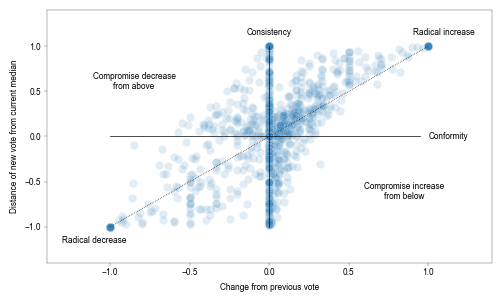

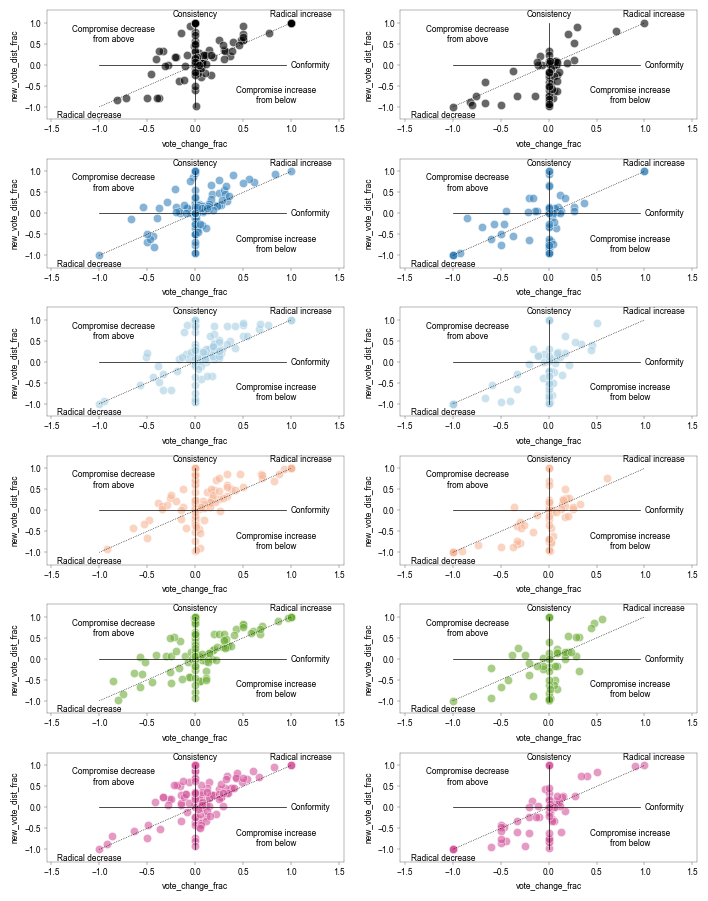

In [40]:

def _annotate_strategies(ax):
    ax.plot([-1, 1], [-1, 1], color='black', linestyle=':')
    ax.plot([-1, 0.95], [0, 0], color='black', linestyle='-')
    ax.plot([0, 0], [-1, 1], color='black', linestyle='-')
    ax.set(ylim=[-1.3, 1.3], xlim=[-1.55, 1.55]) 
    ax.annotate('Radical increase', xytext=(1.1, 1.1), xy=(1, 1), xycoords='data', 
                    fontsize=6, horizontalalignment='center', verticalalignment='bottom')
    ax.annotate('Radical decrease', xytext=(-1.1, -1.1), xy=(-1, -1), xycoords='data', 
                    fontsize=6, horizontalalignment='center', verticalalignment='top')
    ax.annotate('Consistency', xytext=(0, 1.1), xy=(0, 1), xycoords='data', 
                    fontsize=6, horizontalalignment='center', verticalalignment='bottom')
    ax.annotate('Conformity', xytext=(1, 0), xy=(1, 0), xycoords='data', 
                    fontsize=6, horizontalalignment='left', verticalalignment='center')
    ax.annotate('Compromise decrease\nfrom above', xytext=(-0.85, 0.5), xy=(-0.7, 0.7), xycoords='data', 
                    fontsize=6, horizontalalignment='center', verticalalignment='bottom')
    ax.annotate('Compromise increase\nfrom below', xytext=(0.85, -0.5), xy=(0.7, -0.7), xycoords='data', 
                    fontsize=6, horizontalalignment='center', verticalalignment='top')

# # Participants double-down - if they disagree with the median vote, they next vote
# # even more extremely
# # The effect is the same for the rich and poor


# Evidence of radicalization (upward diagonal) and rigidity (horizontal line at vote_change=0)
# Little evidence of conformity (it should show as a strong vertical line at vote_distance=0)
fig, ax = plt.subplots(1, 1, figsize=(5, 3))
_annotate_strategies(ax)
sns.scatterplot(data=df_delta, y="new_vote_dist_frac", x="vote_change_frac", 
                alpha=0.15, ax=ax, color=sns.color_palette("RdBu", 5)[4])
ax.set(ylim=(-1.4, 1.4), xlim=(-1.4, 1.4), ylabel='Distance of new vote from current median', 
       xlabel='Change from previous vote') 
fig.tight_layout(w_pad=3)
plt.savefig('plots/figS9.pdf', format='pdf', bbox_inches='tight')
plt.show()

# Distance of new vote from median vote in previous round as a fraction of the possible 
fig, axes = plt.subplots(6, 2, figsize=(7, 9))
HUE_ORDER = ['repr', 'segr', 'homo', 'hete', 'rich', 'poor']
piyg = sns.color_palette("PiYG", 5)
rdbu = sns.color_palette("RdBu", 5)
HUE_COLOR = ['k', rdbu[4], rdbu[3], rdbu[1], piyg[4], piyg[0]]
for i in range(6):
    _annotate_strategies(axes[i][0])
    sns.scatterplot(data=df_delta[(df_delta['network_type']==HUE_ORDER[i]) & (df_delta['status']=='P')], 
                    y="new_vote_dist_frac", x="vote_change_frac", alpha=0.6, ax=axes[i][0], color=HUE_COLOR[i])
    _annotate_strategies(axes[i][1])
    sns.scatterplot(data=df_delta[(df_delta['network_type']==HUE_ORDER[i]) & (df_delta['status']=='R')], 
                    y="new_vote_dist_frac", x="vote_change_frac", alpha=0.6, ax=axes[i][1], color=HUE_COLOR[i])


fig.tight_layout(w_pad=3)
plt.show()


## 4. Perceptions

### 4A. Satisfaction with initial and final score and perception of fairness

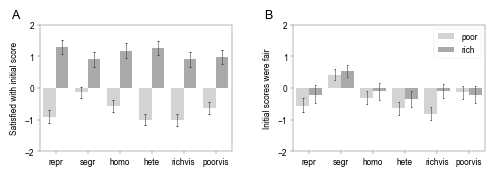

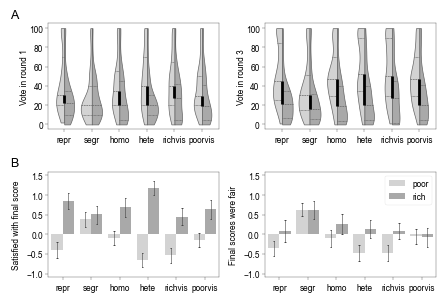

In [41]:
# Initial scores
plot2_bar_by_status(data1=part_df, y1='award_satisfied', title1='', ylim1=[-2, 2], 
                    data2=part_df, y2='award_dist_fair', title2='', ylim2=[-2, 2],
                    subfig_letter=True)

# Final scores
plot_polarization(data12=vote_df, data34=part_df, save='plots/fig4.pdf')

### 4B. Strategy rationale

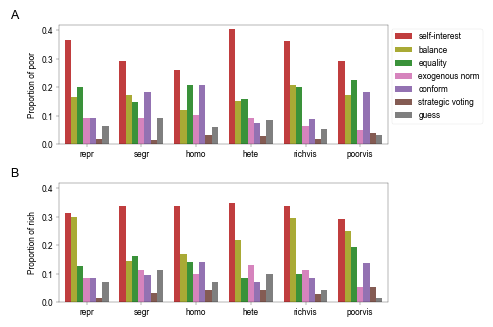

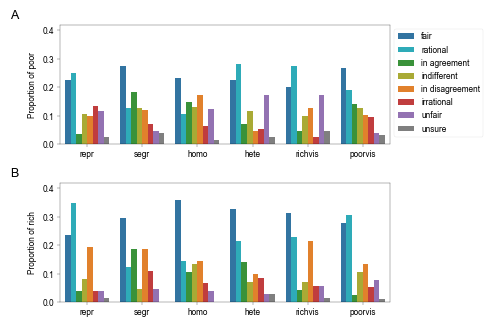

Index(['network_type', 'rationale_code', 'proportion_poor'], dtype='object')


In [42]:
# Order the categorical variables
RAT_CATS = CategoricalDtype(categories=['self-interest', 'balance', 'equality',
                                        'exogenous norm', 'conform', 'strategic voting', 
                                         'guess'])
FEEL_CATS = CategoricalDtype(categories=['fair',  'rational', 'in agreement', 
                                         'indifferent', 
                                         'in disagreement', 'irrational', 'unfair', 
                                         'unsure' ])
NET_CATS = CategoricalDtype(categories=['repr', 'segr', 'homo', 'hete', 'rich', 'poor'])
part_df['rationale_code'] = part_df['rationale_code'].astype(RAT_CATS)
part_df['group_feel_code'] = part_df['group_feel_code'].astype(FEEL_CATS)
part_df['network_type'] = part_df['network_type'].astype(NET_CATS)


# Obtain proportions within network type
propN_ratP = part_df[part_df['status'] == 'P'][['network_type', 'rationale_code']].groupby("network_type").value_counts(normalize=True).reset_index()
propN_ratP.columns = ['network_type', 'rationale_code', 'proportion_poor']
propN_ratR = part_df[part_df['status'] == 'R'][['network_type', 'rationale_code']].groupby("network_type").value_counts(normalize=True).reset_index()
propN_ratR.columns = ['network_type', 'rationale_code', 'proportion_rich']
plot2_bar(data1=propN_ratP, y1='proportion_poor', x1='network_type', hue1='rationale_code', 
          title1='', ylim1=[0,0.42], legend1=True, x1rotate=False,
          data2=propN_ratR, y2='proportion_rich', x2='network_type', hue2='rationale_code', 
          title2='', ylim2=[0,0.42], legend2=False, x2rotate=False,
          subfig_letter=True, vertical=True, legend_out=True, save='plots/figS5.pdf')

propN_grP = part_df[part_df['status'] == 'P'][['network_type', 'group_feel_code']].groupby("network_type").value_counts(normalize=True).reset_index()
propN_grP.columns = ['network_type', 'group_feel_code', 'proportion_poor']
propN_grR = part_df[part_df['status'] == 'R'][['network_type', 'group_feel_code']].groupby("network_type").value_counts(normalize=True).reset_index()
propN_grR.columns = ['network_type', 'group_feel_code', 'proportion_rich']
plot2_bar(data1=propN_grP, y1='proportion_poor', x1='network_type', hue1='group_feel_code', 
          title1='', ylim1=[0,0.42], legend1=True, x1rotate=False,
          data2=propN_grR, y2='proportion_rich', x2='network_type', hue2='group_feel_code', 
          title2='', ylim2=[0,0.42], legend2=False, x2rotate=False,
          subfig_letter=True, vertical=True, legend_out=True, save='plots/figS6.pdf')

print(propN_ratP.columns)


### 4C. Strategy and group feelings by gender

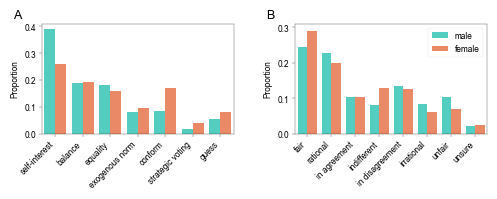

In [43]:
# Obtain proportions within gender for rationale
propG_rat = part_df[(part_df['gender']=='F') | (part_df['gender']=='M')][['gender', 
                                                                          'rationale_code']].groupby("gender").value_counts(normalize=True).reset_index()
propG_rat['gender'] = propG_rat['gender'].astype(CategoricalDtype(categories=['M', 'F']))
# Obtain proportions within gender for group feeling
propG_gr = part_df[(part_df['gender']=='F') | (part_df['gender']=='M')][['gender', 
                                                                         'group_feel_code']].groupby("gender").value_counts(normalize=True).reset_index()
propG_gr['gender'] = propG_gr['gender'].astype(CategoricalDtype(categories=['M', 'F']))

plot2_bar(data1=propG_rat, y1='proportion', x1='rationale_code', hue1='gender', 
          title1='', ylim1=[0,0.41], legend1=False, x1rotate=True,
          data2=propG_gr, y2='proportion', x2='group_feel_code', hue2='gender', 
          title2='', ylim2=[0,0.31], legend2=True, x2rotate=True,
          subfig_letter=True, save='plots/figS8.pdf')


## 5. Demographics

Here, we can use the gender information provided by Prolific, which covers more participants (not everyone completed the exit survey where we collected our own demographic information).

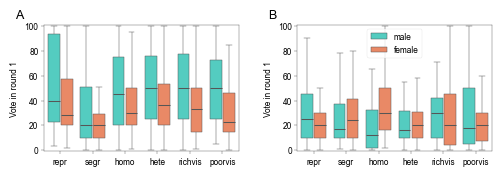

In [44]:
df_demo = pd.merge(vote_df[vote_df['round']==1], turnout_df[['sid', 'p_sex']], on='sid', how='inner')
# There are 9 cases with expired or "prefer not to say" sex, which we will ignore
df_demo = df_demo[(df_demo['p_sex']=='Male') | (df_demo['p_sex']=='Female')]
df_demo['p_sex'] = df_demo['p_sex'].astype(CategoricalDtype(categories=['Male', 'Female']))

df_demoP = df_demo[df_demo['status']=='P']


#mean_vote = np.mean( df_demo['vote'].values )
plot2_y_hue_net_box(data1=df_demo[df_demo['status']=='P'], y1='vote', hue1='p_sex', title1='', ylim1=(-1, 101), 
                    data2=df_demo[df_demo['status']=='R'], y2='vote', hue2='p_sex', title2='', ylim2=(-1, 101), 
                    subfig_letter=True, save='plots/figS7.pdf')

## 6. Alternative analyses

### 6A. Redrawn groups (draw individuals with replacement between groups)

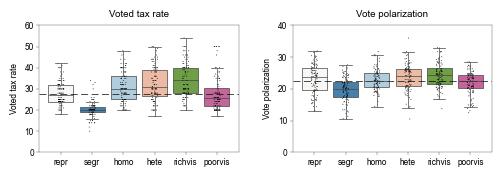

*** Median Vote ***
          segr      homo      hete      rich      poor
repr  0.000***   0.002**  0.000***  0.000***     0.113
segr            0.000***  0.000***  0.000***  0.000***
homo                         0.286   0.003**  0.000***
hete                                  0.067+  0.000***
rich                                          0.000***
*** Mean absolute deviation of votes ***
          segr      homo      hete      rich      poor
repr  0.000***     0.479     0.316     0.130    0.025*
segr            0.000***  0.000***  0.000***  0.000***
homo                        0.043*    0.012*     0.133
hete                                   0.629  0.001***
rich                                          0.000***


In [45]:
# Get simulated groups
df_recomb = get_recombinations(vote_df, reps=100)

# Plot
plot2_y_net_box(data1=df_recomb, y1='median_vote', title1='Voted tax rate', ylim1=(0, 60),
                data2=df_recomb, y2='vote_mad', title2='Vote polarization', ylim2=(0, 40), 
                baseline1=bl_vote_first, baseline2=bl_mad_first)

# Mann-Whitney U
print('*** Median Vote ***')
print(pairwise_test(df_recomb, 'median_vote'))  

print('*** Mean absolute deviation of votes ***')
print(pairwise_test(df_recomb, 'vote_mad'))


### 6B. Resplit groups (reassign individuals to groups without replacement)

Results in 10/20 groups per treatment but in different regrouping that the original groups.

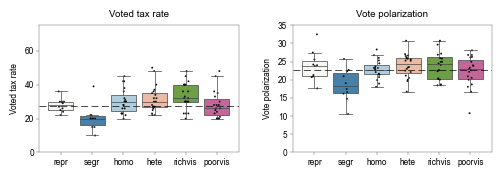

*** Median Vote ***
         segr      homo      hete      rich     poor
repr  0.003**     0.489     0.242    0.041*    0.565
segr           0.001***  0.000***  0.000***  0.006**
homo                        0.662     0.198    0.278
hete                                  0.385    0.112
rich                                          0.034*
*** Mean absolute deviation of votes ***
        segr    homo     hete     rich    poor
repr  0.026*   0.598    0.843    0.878   0.536
segr          0.011*  0.003**  0.006**  0.029*
homo                    0.267    0.407   0.953
hete                             0.882   0.361
rich                                     0.347


In [46]:
# Get simulated groups and plot
df_resplit = get_resplits(vote_df, seed=16, csv_path='exp-data/resplit_groups.csv')
plot2_y_net_box(data1=df_resplit, y1='median_vote', title1='Voted tax rate', ylim1=(0, 75),
                data2=df_resplit, y2='vote_mad', title2='Vote polarization', ylim2=(0, 35), 
                baseline1=bl_vote_first, baseline2=bl_mad_first)

# Mann-Whitney U
print('*** Median Vote ***')
print(pairwise_test(df_resplit, 'median_vote'))  

print('*** Mean absolute deviation of votes ***')
print(pairwise_test(df_resplit, 'vote_mad'))

# For median vote,segr-all and rich-poor are consistently significant, 
# rich-repr is often (> 50%) significant, rich-homo and hete-poor – rarely
# For vote variance, segr-all – often


### 6C. Extra groups (create new groups per tretament by combining others in given observation condition)

The original assignment order and initial score distributions are preserved. In contrast, in the resplitting version, the exact distribution of scores would vary between groups.

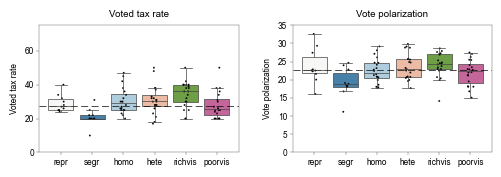

*** Median Vote ***
         segr      homo     hete      rich    poor
repr  0.002**     0.791    0.467    0.070+   0.320
segr           0.001***  0.002**  0.000***  0.015*
homo                       0.635     0.125   0.192
hete                                 0.132   0.155
rich                                        0.010*
*** Mean absolute deviation of votes ***
        segr    homo     hete     rich    poor
repr  0.076+   0.468    0.982    0.441   0.495
segr          0.056+  0.005**  0.003**   0.113
homo                    0.330    0.120   0.860
hete                             0.735   0.256
rich                                    0.060+


In [47]:
df_extra = get_assigned_with_equivalency(vote_df, csv_path='exp-data/extra_groups.csv')
plot2_y_net_box(data1=df_extra, y1='median_vote', title1='Voted tax rate', ylim1=(0, 75),
                data2=df_extra, y2='vote_mad', title2='Vote polarization', ylim2=(0, 35), 
                baseline1=bl_vote_first, baseline2=bl_mad_first)

# Mann-Whitney U
print('*** Median Vote ***')
print(pairwise_test(df_extra, 'median_vote'))  

print('*** Mean absolute deviation of votes ***')
print(pairwise_test(df_extra, 'vote_mad'))

## Combined plot with 100 statisticized groups per treatment

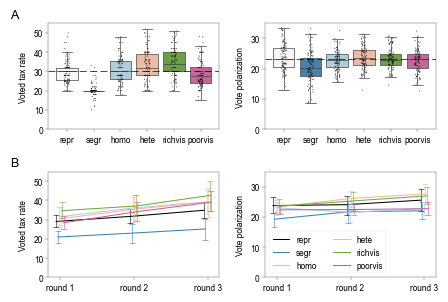

*** Median Vote ***
         segr      homo     hete      rich    poor
repr  0.002**     0.791    0.467    0.070+   0.320
segr           0.001***  0.002**  0.000***  0.015*
homo                       0.635     0.125   0.192
hete                                 0.132   0.155
rich                                        0.010*
*** Mean absolute deviation of votes ***
        segr    homo     hete     rich    poor
repr  0.076+   0.468    0.982    0.441   0.495
segr          0.056+  0.005**  0.003**   0.113
homo                    0.330    0.120   0.860
hete                             0.735   0.256
rich                                    0.060+


In [48]:
df_recomb = get_recombinations(vote_df, reps=100, csv_path='exp-data/simulated_groups.csv')
bl_vote_first = np.median( df_recomb[(df_recomb['network_type']=='repr')]['median_vote'].values )
bl_mad_first = np.median( df_recomb[(df_recomb['network_type']=='repr')]['vote_mad'].values )

plot_results(data12=df_recomb, data34=outcome_df, 
             baseline1=bl_vote_first, baseline2=bl_mad_first, 
             save='plots/fig3.pdf')

# Mann-Whitney U
print('*** Median Vote ***')
print(pairwise_test(df_extra, 'median_vote'))  

print('*** Mean absolute deviation of votes ***')
print(pairwise_test(df_extra, 'vote_mad'))

### 6D. Whole-sample estimates (combined vote for all in given observation condition)

In [49]:
df_whole = get_whole_sample_estimates(vote_df, csv_path='')
print(df_whole)

     network_type  median_vote  score_gini    vote_var   vote_mad  vote_kurt
1438         hete           30    0.009504  865.113740  24.533255  -0.553414
959          homo           30    0.009518  793.961478  22.987391  -0.135604
480          poor           25    0.012161  789.099519  22.955644  -0.034520
1918         repr           29    0.019617  915.234153  24.266146  -0.218745
0            rich           33    0.008296  865.299369  24.316536  -0.595458
2158         segr           20    0.031287  662.599093  19.916875   1.175159
